Q1 Calculate the mean, median, mode and standard deviation for the problem
statements 1& 2.
Problem Statement 1:
The marks awarded for an assignment set for a Year 8 class of 20 students were as
follows:
6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8

In [2]:
import numpy as np
from scipy import stats
import math
import statistics
import os
import sys

In [7]:
df = np.asarray([6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8])

In [8]:
def stats(df):
    print(f"The mean is {np.mean(df)}")
    print(f"The median  is {np.median(df)}")
    print(f"The mode  is {statistics.mode(df)}")
    print(f"The standard Deviation is {np.std(df)}")
    
stats(df)

The mean is 6.85
The median  is 7.0
The mode  is 7
The standard Deviation is 1.5898113095584647


Problem Statement 2:
The number of calls from motorists per day for roadside service was recorded for a
particular month:
28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,
100, 75, 104, 97, 75,
123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109

In [9]:
calls=np.asarray([28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109])

In [10]:
stats(calls)

The mean is 107.51428571428572
The median  is 100.0
The mode  is 75
The standard Deviation is 38.77287080168403


Problem Statement 3:
The number of times I go to the gym in weekdays, are given below along with its
associated probability:
x = 0, 1, 2, 3, 4, 5
f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01
Calculate the mean no. of workouts in a week. Also evaluate the variance involved in
it.

In [11]:
x = np.asarray([0,1,2,3,4,5])
f_x = np.array([0.09,0.15,0.40,0.25,0.10,0.01])

In [12]:
x.reshape((1,-1))
f_x.reshape((-1,1))

array([[0.09],
       [0.15],
       [0.4 ],
       [0.25],
       [0.1 ],
       [0.01]])

In [14]:
mean=np.dot(x,f_x)
mean

2.1500000000000004

In [20]:
variance_of_x=(x-mean)**2
variance = np.dot(variance_of_x.reshape(1,-1),f_x)

In [22]:
print(f"Mean is: {mean}")
print(f"Variance is: {variance}")

Mean is: 2.1500000000000004
Variance is: [1.2275]


Problem Statement 4:
Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF (𝑑) =
20𝑒−20(𝑑−12.5), 𝑑 ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm? What is your conclusion regarding the proportion of scraps?

In [23]:
from scipy import integrate

In [24]:
PDF=lambda d:20*(np.exp((-20*(d-12.5))))
x = 12.6
P_x=integrate.quad(PDF,12.6,np.inf)
y = 11
CDF=integrate.quad(PDF,-np.inf,y)
print(f"Proportion of Parts need to be scrapped when d >12.6mm is :{P_x[0]}")
print(f"CDF when d= 11mm is:{CDF[0]}")
print(f"Proportion of CDF when d>12.5mm is : {integrate.quad(PDF,12.5,np.inf)[0]}")

#Conclusion
#We can conclude that the function is only valid when d>=12.5. 
#When d<12.5, the part is reworked to 12.5 so there is no scrap in such scenrio.
#PDF is not defined for d=11

Proportion of Parts need to scrapped when d >12.6mm is :0.13533528323661398
CDF when d= 11mm is:nan
Proportion of CDF when d>12.5mm is : 1.0000000000000024


<ipython-input-24-6acca5595d8c>:1: RuntimeWarning: overflow encountered in exp
  PDF=lambda d:20*(np.exp((-20*(d-12.5))))
<ipython-input-24-6acca5595d8c>:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  CDF=integrate.quad(PDF,-np.inf,y)


Problem Statement 5:
A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
Calculate the average value of this process. Also evaluate the standard deviation
associated with it.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import scipy.special

p    2.000000
q    0.324135
Name: 2, dtype: float64


C:\Users\Samruddhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Probability of Fault rate')

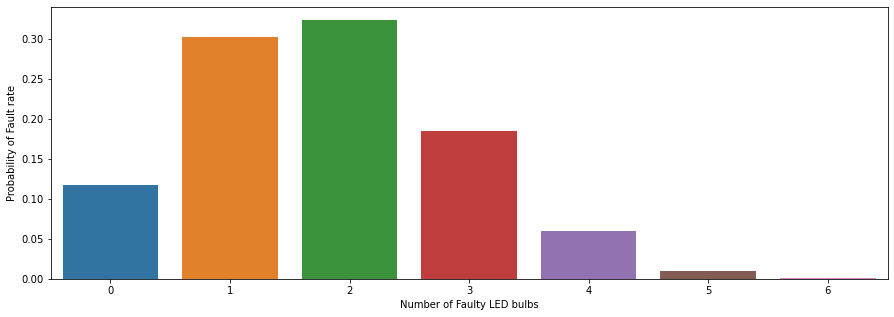

In [30]:
x = 0.3
y = 0.7
df=pd.DataFrame({'p':[int(i) for i in range(7)],
                 'q':[scipy.special.comb(6,i)*(x**i)*(y**(6-i)) for i in range(7)]})
print(df.iloc[2])
plt.figure(figsize=(15,5))
sns.barplot('p','q',data=df)
plt.xlabel('Number of Faulty LED bulbs')
plt.ylabel('Probability of Fault rate')

In [31]:
df['Expected value']=df['p']*df['q']
mean=np.round(df['Expected value'].sum())
print('mean = {}'.format(mean))
df['variance']=df['q']*(df['p']-mean)**2
std=np.sqrt(df['variance'].sum())
print(f"Standard Deviation : {np.round(std)}")

mean = 2.0
Standard Deviation : 1.0


Problem Statement 6:
Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to
solve 8 questions per day with a correction rate of 75%, while Barakha averages
around 12 questions per day with a correction rate of 45%. What is the probability
that each of them will solve 5 questions correctly? What happens in cases of 4 and 6
correct solutions? What do you infer from it? What are the two main governing
factors affecting their ability to solve questions correctly? Give a pictorial
representation of the same to validate your answer.

In [32]:
from scipy.stats import binom
import numpy as np

In [33]:
print(f"Probability of each of them solving 5 questions correctly is:{binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)}")
print(f"Probability of each of them solving 4,6 questions correctly is:{binom.pmf(4,8,0.75)*binom.pmf(6,12,0.45)}")

Probability of each of them solving 5 questions correctly is:0.04619989057299213
Probability of each of them solving 4,6 questions correctly is:0.018374956477894576


In [36]:
def binom_plot(n,p,):
    fig,ax=plt.subplots(1,1)
    x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)

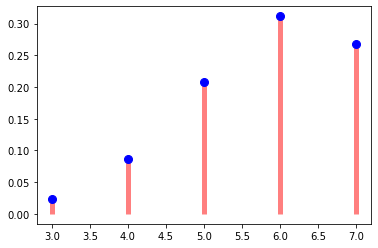

In [37]:
binom_plot(8,0.75)

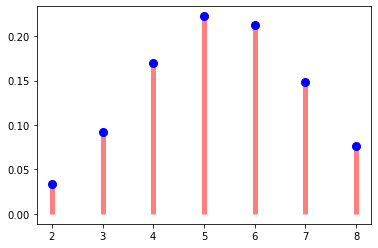

In [38]:
binom_plot(12,0.45)

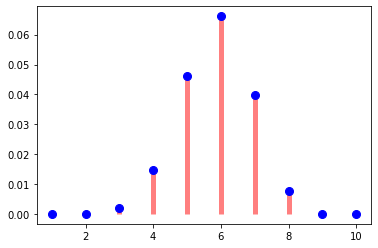

In [40]:

fig,ax=plt.subplots(1,1)
x = np.arange(1,11)
ax.plot(x, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), colors='r', lw=5, alpha=0.5)

In [41]:

from scipy.stats import binom
binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)

0.04619989057299213

Problem Statement 7:
Customers arrive at a rate of 72 per hour to my shop. What is the probability of 𝑘
customers arriving in 4 minutes? a) 5 customers, b) not more than 3 customers, c)
more than 3 customers. Give a pictorial representation of the same to validate your
answer.

In [42]:
from scipy.stats import poisson

In [43]:
mu = 4*(72/60) #customers come per 4 minutes
print(f"The probability of arriving 5 cutomers in 4 minutes is : {poisson.pmf(k=5,mu=mu)}")
print(f"The probability of arriving not more than 3 customers in 4 minutes is : {poisson.pmf(k=3, mu=mu)}")
print(f'The Probability of more than 3 customers arriving in 4 minutes is : {1-poisson.cdf(k=3,mu=mu)}')

The probability of arriving 5 cutomers in 4 minutes is : 0.17474768364388296
The probability of arriving not more than 3 customers in 4 minutes is : 0.15169069760753714
The Probability of more than 3 customers arriving in 4 minutes is : 0.7057700835034357


Text(0, 0.5, 'Probability')

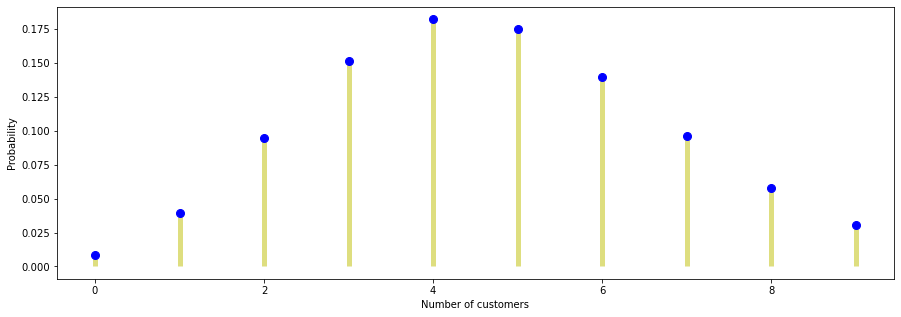

In [44]:
x = list(range(0,10))
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x, poisson.pmf(x,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='y', lw=5, alpha=0.5)
plt.xlabel('Number of customers')
plt.ylabel('Probability')

Problem Statement 8:
I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make
reports, where I have the efficiency of entering 77 words per minute with 6 errors per
hour. What is the probability that I will commit 2 errors in a 455-word financial report?
What happens when the no. of words increases/decreases (in case of 1000 words,
255 words)?
How is the 𝜆 affected?
How does it influence the PMF?
Give a pictorial representation of the same to validate your answer.

The pobability of commiting 2 errors in 455 words financial report is :0.09669027375144444
The pobability of commiting 2 errors in 1000 words financial report is :0.23012815007300153
The pobability of commiting 2 errors in 255 words financial report is :0.039377135392854104


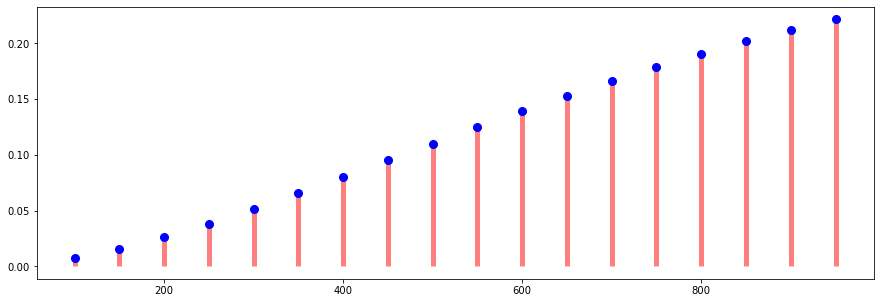

In [45]:
from scipy.stats import poisson
unit_mu=0.1/77
def mu(n):
    return n * unit_mu
print(f"The pobability of commiting 2 errors in 455 words financial report is :{poisson.pmf(2,mu=mu(455))}")
print(f"The pobability of commiting 2 errors in 1000 words financial report is :{poisson.pmf(2,mu=mu(1000))}")
print(f"The pobability of commiting 2 errors in 255 words financial report is :{poisson.pmf(2,mu=mu(255))}")
x=range(100,1000,50)
mu=[i*unit_mu for i in x]
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,poisson.pmf(2,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0, poisson.pmf(2,mu), colors='r', lw=5, alpha=0.5)


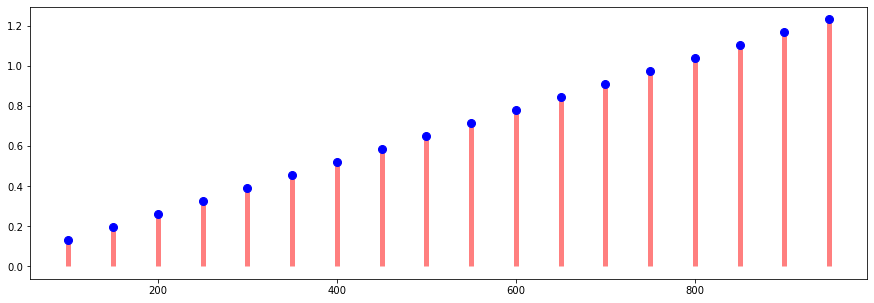

In [46]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,mu, 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0,mu, colors='r', lw=5, alpha=0.5)
##Here we can see that mu increases with the number of words

Problem Statement 9:
Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF, f(d) =
20e−20(d−12.5), d ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm?
What is the conclusion of this experiment?

Same problem number 4. Same solution

Problem Statement 10:
Please compute the following:
a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05
c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99

In [49]:
from scipy.stats import norm
def P(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]

print('P(Z>1.26) = %.5f'%(1-P(1.26)))
print('P(Z<-0.86) = %.5f'%P(-0.86))
print('P(Z>-1.37) = %.5f'%(1-P(-1.37)))
print('P(−1.25 < Z < 0.37) = %.5f'%P(0.37,b=-1.25))
print('P(Z ≤ −4.6) = %.5f'%P(-4.6))

P(Z>1.26) = 0.10383
P(Z<-0.86) = 0.19489
P(Z>-1.37) = 0.91466
P(−1.25 < Z < 0.37) = 0.53866
P(Z ≤ −4.6) = 0.00000


In [50]:
print('P(Z>z)=0.05 is %.2f'%(-1*norm.ppf(0.05)))
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is %.2f'%(abs(norm.ppf(0.005))))

P(Z>z)=0.05 is 1.64
𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.58


Problem Statement 11:
The current flow in a copper wire follow a normal distribution with a mean of 10 𝑚A
and a variance of 4 (𝑚𝐴)2.
What is the probability that a current measurement will exceed 13 𝑚𝐴? What is the
probability that a current measurement is between 9 and 11mA? Determine the
current measurement which has a probability of 0.98.

In [51]:
mean = 10
std = np.sqrt(4)

def I(z, b=-np.inf):
    z = (z-mean)/std
    return integrate.quad(norm.pdf,b,z)[0]
print(f"Probability that current > 13 mA is: {1-I(13)}")
print(f"Probability that current is between 9 mA and 11 mA is : {1-I(11,b=9)}")

Probability that current > 13mA is: 0.06680720126885797
Probability that current is between 9 mA and 11 mA is : 1.3085375387259144


Problem Statement 12:
The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch
and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓
0.0015 inch. What proportion of shafts are in sync with the specifications? If the
process is centered so that the mean is equal to the target value of 0.2500, what
proportion of shafts conform to the new specifications? What is your conclusion from
this experiment?

In [53]:
mean_dia=0.2508
std_dia=0.0005
def I(mean,std,a,b) :
  a=(a-mean)/std
  b=(b-mean)/std
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2508,I(0.2508,0.0005,0.2485,0.2515)}")
print(f"Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:{0.2500,I(0.2500,0.0005,0.2485,0.2515)}")

Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.2508, None)
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter:(0.25, None)
